In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# dataset
data = np.genfromtxt('data/advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Normalize input data by uasing mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X-avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)



In [7]:
import numpy as np

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # thetas = np.random.randn(4, 1) # Uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    N = len(y)  # Assuming y is a 1D array or a column vector
    
    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N) # In real application, you should use this code
            random_index = i  # This code is used for this assignment only
            
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # Compute output
            output = np.dot(xi, thetas)
            
            # Compute loss li
            li = (output - yi) ** 2 / 2
            
            # Compute gradient for loss
            gradients = np.dot(xi.T, (output - yi))
            
            # Update theta
            thetas = thetas - learning_rate * gradients
            
            # Logging
            thetas_path.append(thetas.copy())
            losses.append(li[0][0])
    
    return thetas_path, losses


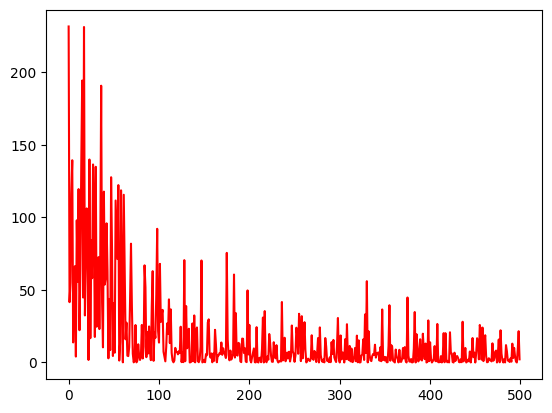

In [10]:
stochastic_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color='r')
plt.show()



Question 1

In [14]:
stochastic_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

6754.643359356192


In [15]:
import numpy as np

def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # thetas = np.random.randn(4, 1) # Uncomment this for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    N = len(y)  # Số lượng mẫu dữ liệu

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # Sử dụng trong ứng dụng thực
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])
        
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            # Compute output
            output = np.dot(xi, thetas)
            
            # Compute loss
            loss = (output - yi) ** 2 / 2
            
            # Compute gradient
            gradients = np.dot(xi.T, (output - yi)) / minibatch_size
            
            # Update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas.copy())
            
            # Log mean loss
            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)
    
    return thetas_path, losses


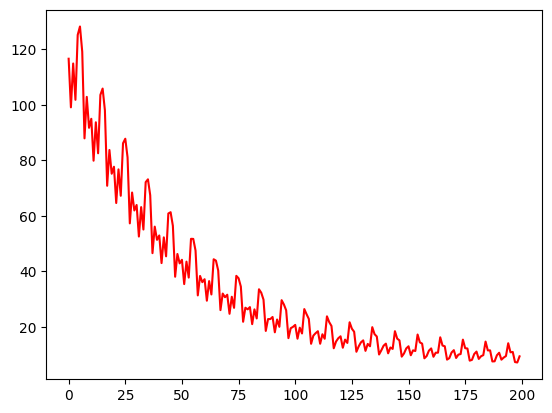

In [16]:
mbgd_thetas, losses = mini_batch_gradient_descent (X_b, y,n_epochs=50, minibatch_size=20 , learning_rate=0.01)

x_axis = list(range(200))
plt.plot ( x_axis , losses [:200] , color ="r")
plt.show()


Question 2

In [18]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b, y, n_epochs =50, minibatch_size=20, learning_rate=0.01)
print(round(sum(losses), 2))

8865.65


In [20]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    # thetas = np.random.randn(4, 1) # Uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    N = len(y)  # Số lượng mẫu dữ liệu

    for epoch in range(n_epochs):
        # Compute output (prediction)
        output = np.dot(X_b, thetas)
        
        # Compute loss (Mean Squared Error)
        loss = (output - y) ** 2 / 2
        
        # Compute gradient (derivative of loss with respect to thetas)
        gradients = np.dot(X_b.T, (output - y)) / N
        
        # Update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas.copy())
        
        # Compute mean loss
        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)
    
    return thetas_path, losses


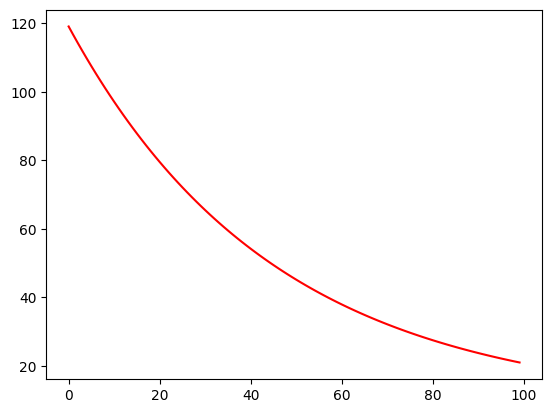

In [21]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses [:100], color ="r")
plt.show()

Question 3

In [23]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses), 2))


5353.15


Question 4

In [24]:
import pandas as pd

df = pd.read_csv('data/BTC-Daily.csv')
df = df.drop_duplicates()

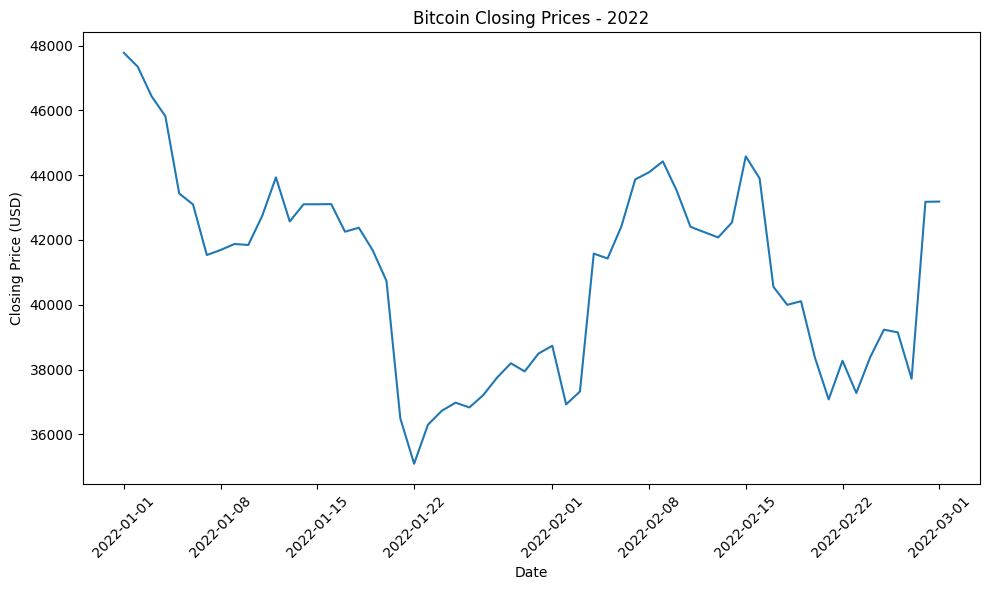

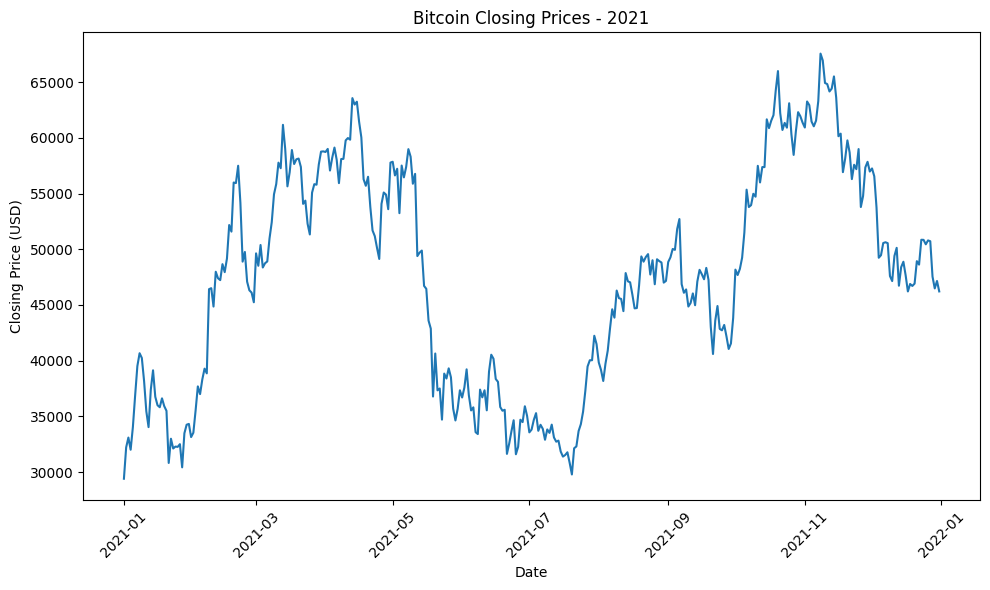

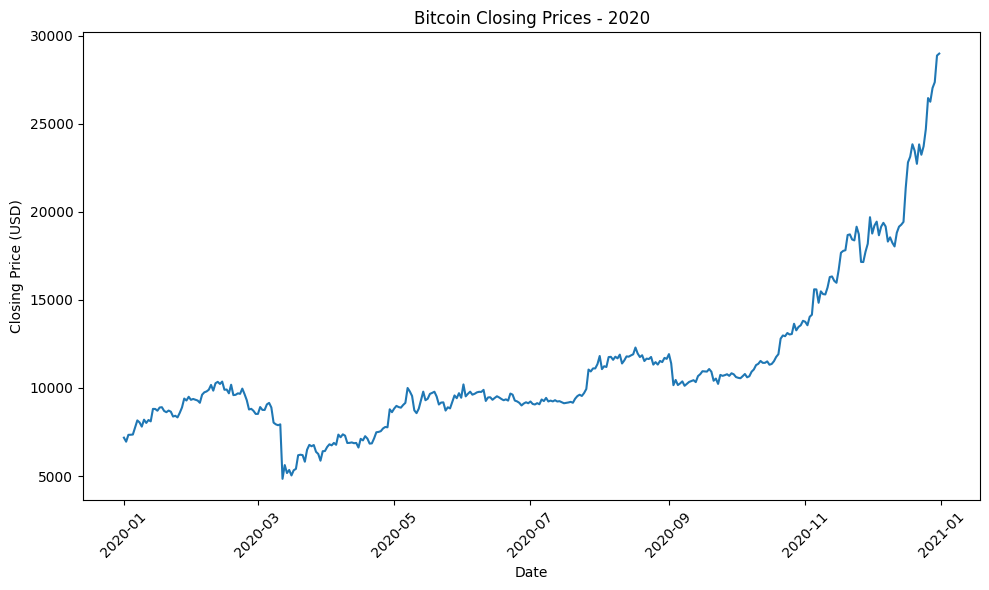

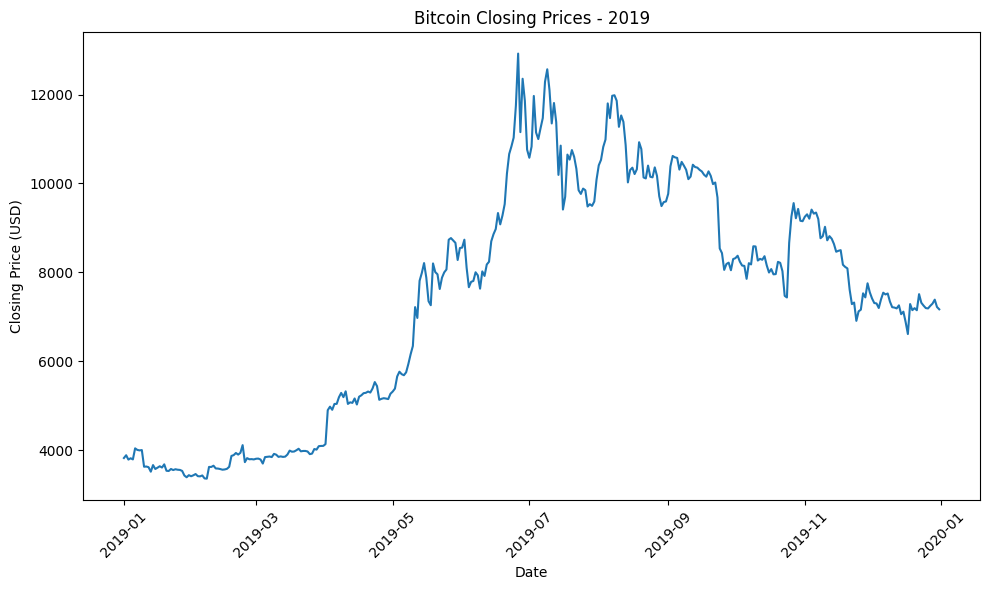

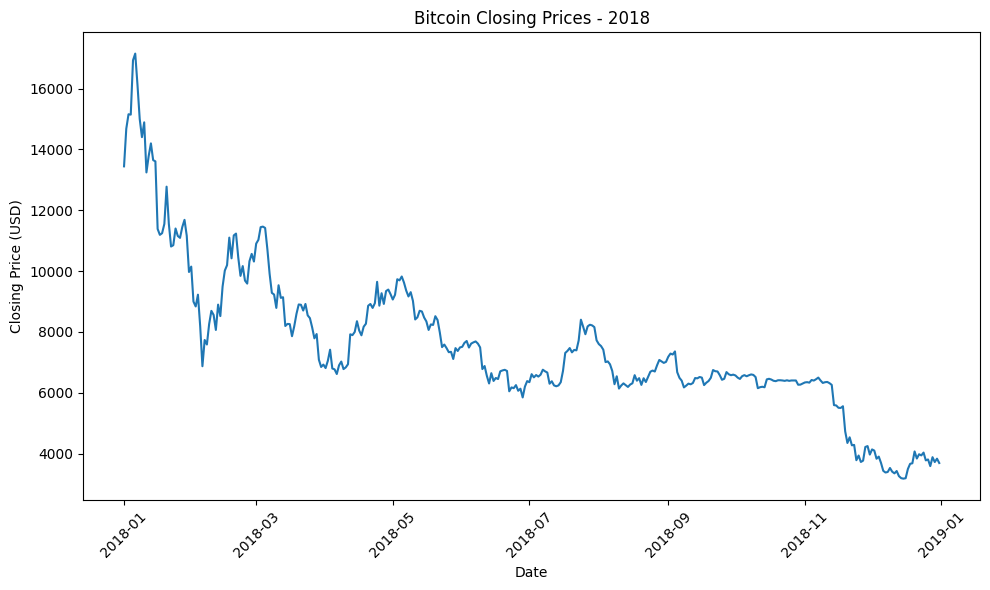

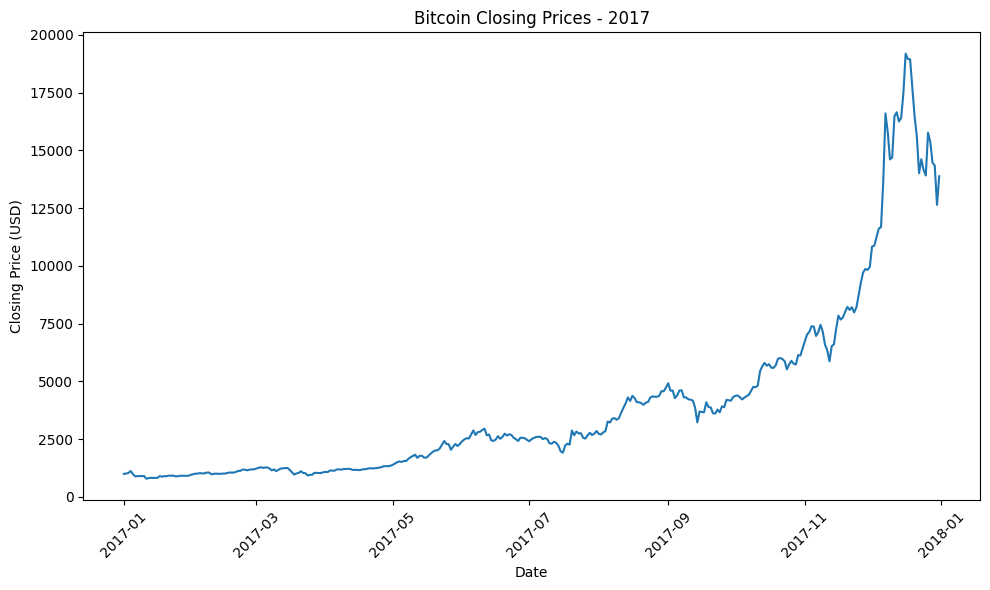

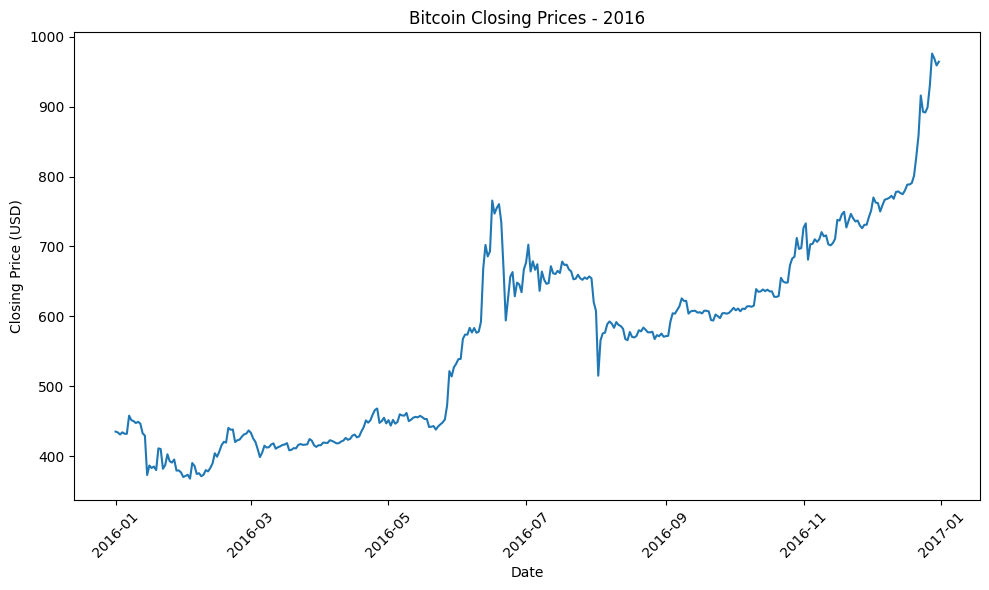

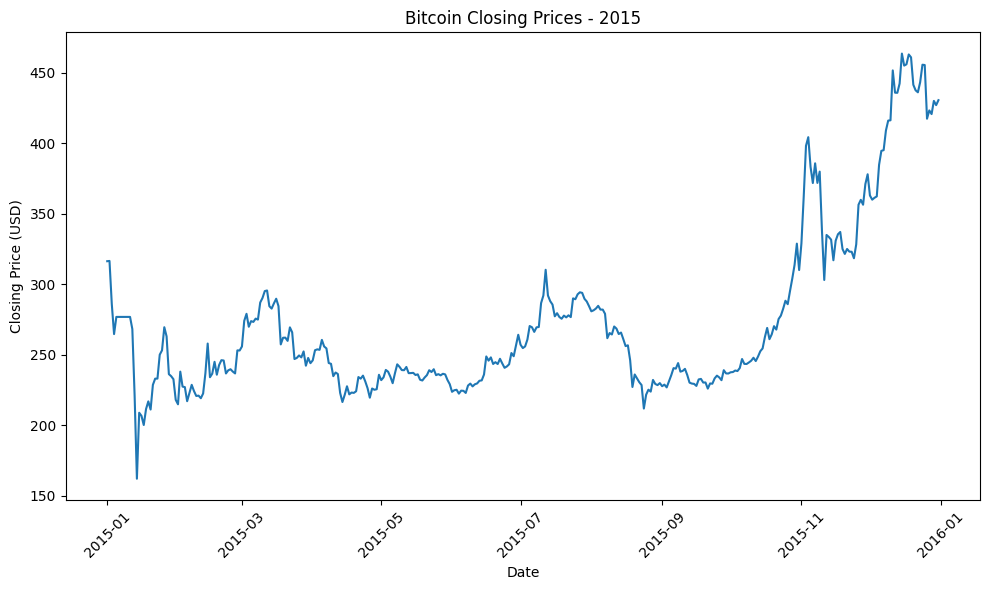

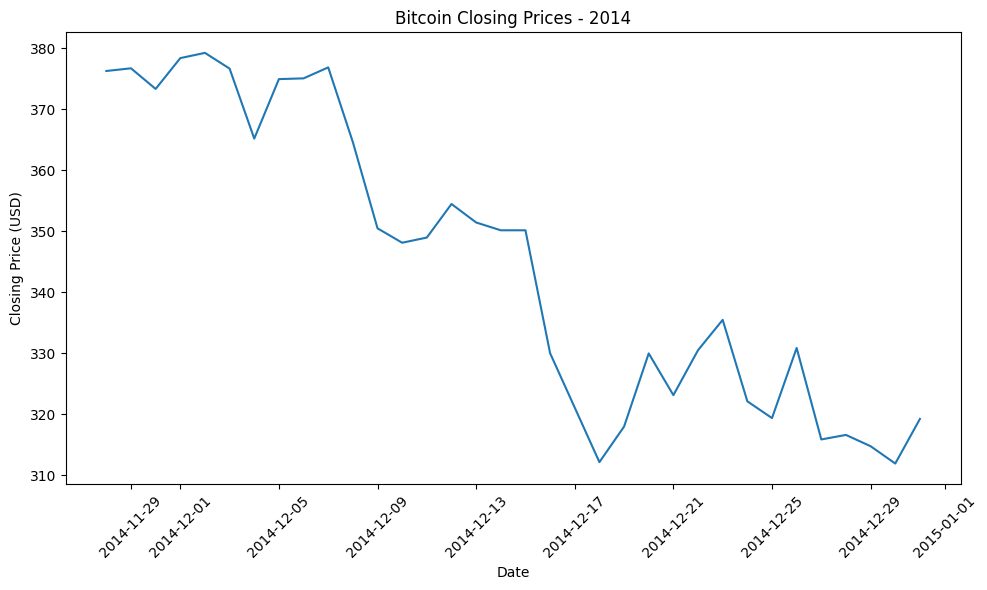

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

unique_years = df['year'].unique()

for year in unique_years:
    year_data = df[df['year'] == year]
    
    year_month_day = pd.DataFrame({
        'year': year_data['year'],
        'month': year_data['month'],
        'day': year_data['day'],
        'date_x': year_data['date']
    })

    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [26]:
!pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable


C:\Users\huy\AppData\Local\Temp\ipykernel_25420\2417475459.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


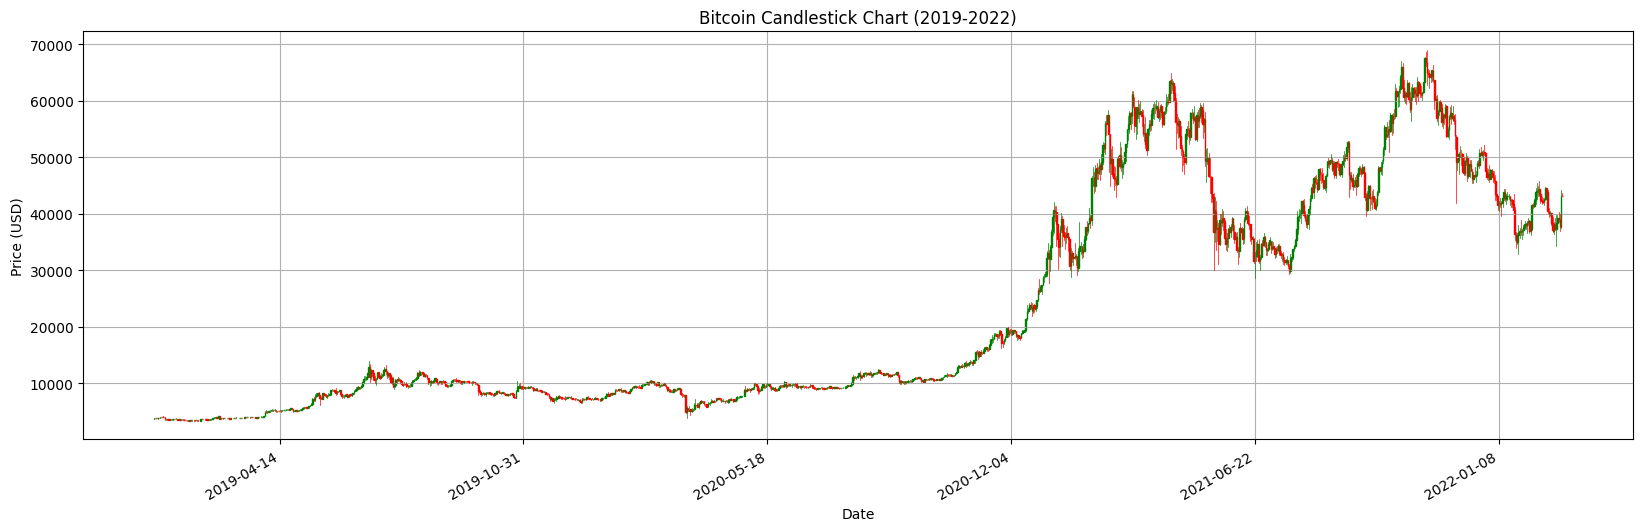

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values,
                 width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.grid(True)

plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()


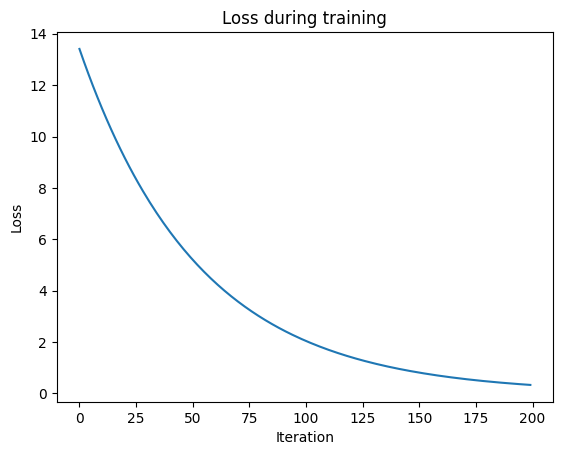

Root Mean Square Error (RMSE): 0.8829
Mean Absolute Error (MAE): 0.7818
Mean Absolute Percentage Error (MAPE): 13.7863 %
Training Accuracy (R-squared): 0.8101
Testing Accuracy (R-squared): 0.7748


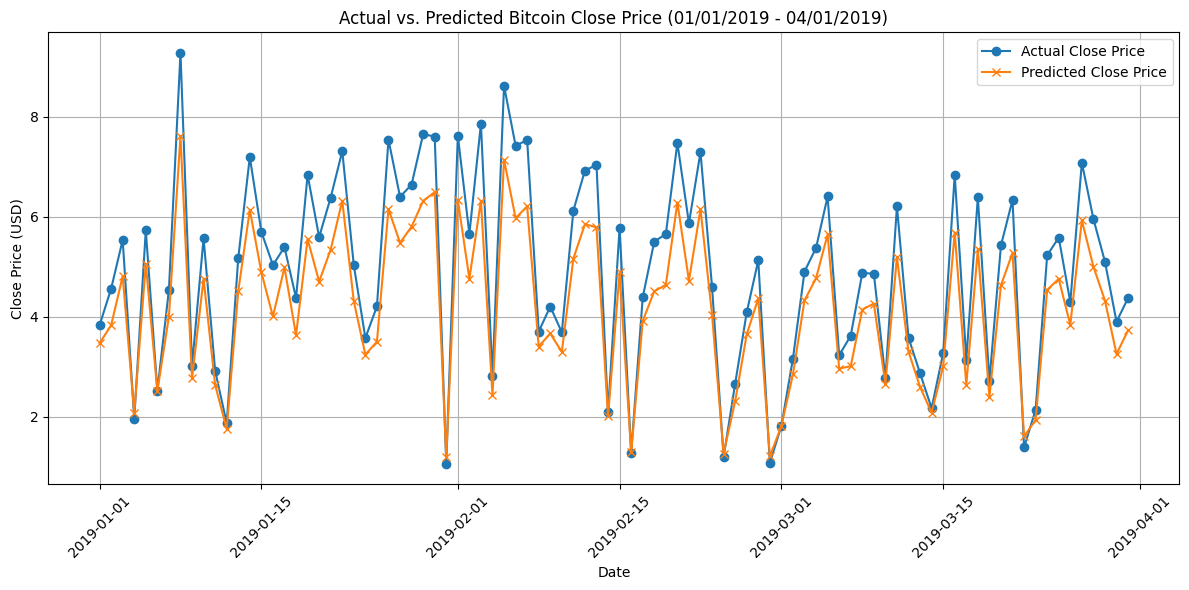

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

def predict(X, w, b):
    return X.dot(w) + b


def gradient(y_hat, y, X):
    loss = y_hat - y
    dw = X.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss ** 2) / (2 * len(y))
    return dw, db, cost


def update_weight(w, b, lr, dw, db):
    w_new = w - lr * dw
    b_new = b - lr * db
    return w_new, b_new

def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  
    b = 0  
    losses = []
    
    for _ in range(num_iterations):
        y_hat = predict(X, w, b) 
        dw, db, cost = gradient(y_hat, y, X)  
        w, b = update_weight(w, b, learning_rate, dw, db)  
        losses.append(cost) 

    return w, b, losses


np.random.seed(42)
X = np.random.rand(100, 3)  
y = 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100) * 0.1  # Linear relation with noise

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

learning_rate = 0.01
num_iterations = 200
w, b, losses = linear_regression_vectorized(X_train, y_train, learning_rate, num_iterations)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.show()

# Evaluation on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 4), "%")
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

# Inference: Predicting on new data (01/01/2019 - 01/04/2019)
# Assuming df_2019_q1 is preprocessed and available
# Example random data (replace with actual data filtering and processing)
dates = np.arange('2019-01-01', '2019-04-01', dtype='datetime64[D]')
X_2019_q1 = np.random.rand(len(dates), 3)  # Example new data, replace with actual features
y_2019_q1_actual = 3 * X_2019_q1[:, 0] + 5 * X_2019_q1[:, 1] + 2 * X_2019_q1[:, 2] + np.random.randn(len(dates)) * 0.1

X_2019_q1 = scaler.transform(X_2019_q1)

y_2019_q1_pred = predict(X_2019_q1, w, b)

plt.figure(figsize=(12, 6))
plt.plot(dates, y_2019_q1_actual, label='Actual Close Price', marker='o')
plt.plot(dates, y_2019_q1_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
